<h1>Distribución t-student. B</h1>

A01639224 | Fausto Alejandro Palma Cervantes

TC3006C.102 | Inteligencia artificial avanzada para la ciencia de datos I

24 de agosto de 2023


## Librerías y módulos

In [1]:
# Importar librerías y módulos necesarios
import pandas as pd
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np

## 1.- Convierte los datos en un DataFrame.

Esto te ayudará a realizar tus cálculos

In [2]:
# Datos
data = {'A': [20, 25, 22, 23, 28, 26, 24, 21, 27, 25, 24, 22, 23, 26, 25,
              23, 24, 22, 27, 26, 25, 24, 23, 22, 21, 26, 24, 25, 22, 23],
        'B': [19, 18, 21, 20, 23, 22, 20, 19, 22, 21, 20, 19, 18, 23, 22,
              21, 20, 19, 23, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 18]}

# Convertir a DataFrame
df = pd.DataFrame(data=data)

df.head()

,A,B
0,20,19
1,25,18
2,22,21
3,23,20
4,28,23


## 2.- Realiza una gráfica QQ-plot para determinar si los datos siguen una distribución normal.

Recuerda que por defecto el método QQ-plot compara los datos con una normal estandar. Para obtener un correcto ajuste estandariza los datos o cambia los parámetros de la gráfica QQ-plot.



In [3]:
# Estandarizar los datos
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

QQ-plot del Tipo de Jugo A:


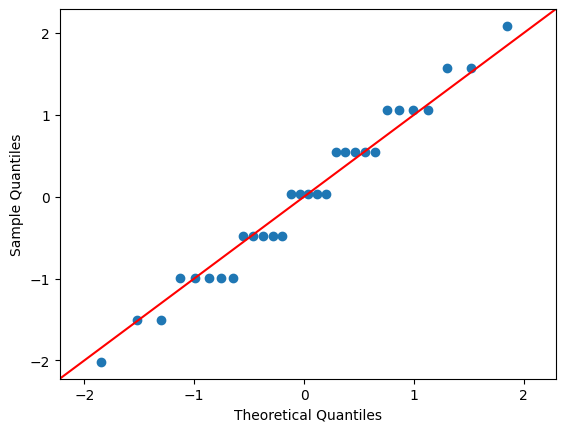

In [4]:
# Crear la gráfica QQ-plot con una distribución normal (Jugo A)
print('QQ-plot del Tipo de Jugo A:')
fig = sm.qqplot(df_standardized['A'], line='45')

QQ-plot del Tipo de Jugo B:


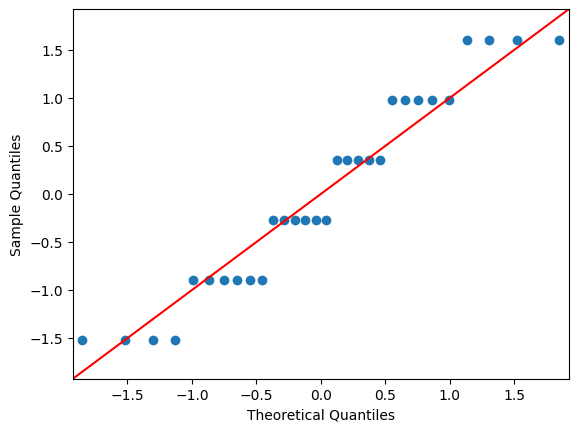

In [5]:
# Crear la gráfica QQ-plot con una distribución normal (Jugo B)
print('QQ-plot del Tipo de Jugo B:')
fig = sm.qqplot(df_standardized['B'], line='45')

## 3.- Aplica el test de Kolmogorov Smirnov para asegurarte si los datos son o no normales.

Por defecto el test Kolmogorov compara los datos con una normal estandar, cambia los parámetros o estandariza los datos.

In [6]:
# Aplicar el test de Kolmogorov Smirnov (Jugo A)
ktest = stats.kstest(df_standardized['A'], 'norm')

# Imprimir resultados
print('Resultados del test de Kolmogorov Smirnov para el Tipo de Jugo A:')
print(ktest)

Resultados del test de Kolmogorov Smirnov para el Tipo de Jugo A:
KstestResult(statistic=0.11738896673840382, pvalue=0.7596266894154436, statistic_location=-0.4790701375804085, statistic_sign=1)


In [7]:
# Aplicar el test de Kolmogorov Smirnov (Jugo B)
ktest = stats.kstest(df_standardized['A'], 'norm')

# Imprimir resultados
print('Resultados del test de Kolmogorov Smirnov para el Tipo de Jugo B:')
print(ktest)

Resultados del test de Kolmogorov Smirnov para el Tipo de Jugo B:
KstestResult(statistic=0.11738896673840382, pvalue=0.7596266894154436, statistic_location=-0.4790701375804085, statistic_sign=1)


Al analizar los resultados del test de Kolmogorov Smirnov entre los datos y una normal estándar se pueden observar p-valores altos. Dentro del contexto del problema, el p-valor indica la similitud que existe entre la normal estándar y los datos (siendo la hipótesis nula que no hay diferencias importantes entre ambas). Ya que se tienen p-valores altos es posible rechazar la hipótesis nula. Pese a ello, no se puede concluir que los datos siguen a la normal estándar. Al ver las gráficas QQ-plot que se hicieron anteriormente de los mismos datos es posible observar que los datos tienen tendencias similares a la normal estándar pero que no siguen la línea diagonal de cerca, especialmente notable en su forma escalonada. Considerando toda la información disponible, se puede concluir que los datos no son normales.

## 4.- En caso de que no sean normales considera que tienen una distribución t-student.

## 5.- Calcula el intervalo de confianza de acuerdo con la distribución de los datos y el nivel de confianza solicitado.

In [11]:
# Conjunto de datos (Jugo A)
data = df['A']

# Nivel de confianza (99%)
confidence_level = 0.99

# Calcular el valor crítico
t_critical = stats.t.ppf((1+confidence_level)/2, len(data)-1)

# Calcular el margen de error
margin_of_error = t_critical * (np.std(data, ddof=1) / np.sqrt(len(data)))

# Calcular el intervalo de confianza
confidence_interval = (np.mean(data) - margin_of_error, np.mean(data) + margin_of_error)

# Imprimir el intervals de confianza
print('Intervalo de confianza para el Tipo de Jugo A:')
print(confidence_interval)

Intervalo de confianza para el Tipo de Jugo A:
(22.936141535685323, 24.930525130981344)


In [12]:
# Conjunto de datos (Jugo B)
data = df['B']

# Nivel de confianza (99%)
confidence_level = 0.99

# Calcular el valor crítico
t_critical = stats.t.ppf((1+confidence_level)/2, len(data)-1)

# Calcular el margen de error
margin_of_error = t_critical * (np.std(data, ddof=1) / np.sqrt(len(data)))

# Calcular el intervalo de confianza
confidence_interval = (np.mean(data) - margin_of_error, np.mean(data) + margin_of_error)

# Imprimir el intervals de confianza
print('Intervalo de confianza para el Tipo de Jugo B:')
print(confidence_interval)

Intervalo de confianza para el Tipo de Jugo B:
(19.611360740938043, 21.255305925728624)
